In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

KeyboardInterrupt: 

In [151]:
import seaborn as sns

In [109]:
dfd = pd.read_csv(r'demandeurs_4_revenus.csv', index_col = 0)

In [110]:
dfd=dfd.rename(columns={'Type de ressource\n': 'Type'})
dfd

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n
0,001011403466511146,2134.0,Allocation chômage / indemnités,240.0
1,001011403466511146,2134.0,Allocation familiales,424.0
2,001011403466511146,2134.0,Autres (hors APL ou AL),517.0
3,001011403466511146,2134.0,Salaire ou revenu d'activité,953.0
4,0010117074877GDPUB,900.0,Allocation familiales,700.0
...,...,...,...,...
152672,974111715873511487,1725.0,Retraite,1725.0
152673,9741216133916GDPUB,2000.0,Salaire ou revenu d'activité,2000.0
152674,9741216133920GDPUB,846.0,Retraite,846.0
152675,9741217158325GDPUB,33.0,Allocation chômage / indemnités,33.0


In [111]:
dfd['Ressources mensuelles\n'].isna().sum()

2813

In [112]:
dfdbis=dfd.drop_duplicates(subset ="Numéro Unique")
dfdbis=dfdbis.dropna()
dfdbis

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n
0,001011403466511146,2134.0,Allocation chômage / indemnités,240.0
4,0010117074877GDPUB,900.0,Allocation familiales,700.0
6,001021504965918214,944.0,Allocation familiales,129.0
8,0010217076033GDPUB,1200.0,Allocation chômage / indemnités,1200.0
9,001021707620301173,1200.0,Salaire ou revenu d'activité,1200.0
...,...,...,...,...
152671,9741117155529GDPUB,674.0,Revenu de solidarité active (RSA),674.0
152672,974111715873511487,1725.0,Retraite,1725.0
152673,9741216133916GDPUB,2000.0,Salaire ou revenu d'activité,2000.0
152674,9741216133920GDPUB,846.0,Retraite,846.0


### Calcul des ressources imposables mensuelles

In [113]:
values=["Retraite", "Allocation chômage / indemnités", "Salaire ou revenu d'activité", "Pension alimentaire reçue", "Autres (hors APL ou AL)", "Pension d\'invalidité"]
filtered_df = dfd[dfd.Type.isin(values)]
filtered_df

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n
0,001011403466511146,2134.0,Allocation chômage / indemnités,240.0
2,001011403466511146,2134.0,Autres (hors APL ou AL),517.0
3,001011403466511146,2134.0,Salaire ou revenu d'activité,953.0
5,0010117074877GDPUB,900.0,Pension alimentaire reçue,200.0
8,0010217076033GDPUB,1200.0,Allocation chômage / indemnités,1200.0
...,...,...,...,...
152670,974091715322011487,2121.0,Salaire ou revenu d'activité,2083.0
152672,974111715873511487,1725.0,Retraite,1725.0
152673,9741216133916GDPUB,2000.0,Salaire ou revenu d'activité,2000.0
152674,9741216133920GDPUB,846.0,Retraite,846.0


In [114]:
shrank_values = filtered_df.groupby(by='Numéro Unique').sum()['Montant par type de ressource\n']

merged_df = filtered_df.merge(shrank_values, left_on='Numéro Unique', right_index=True)

merged_df = merged_df.rename(columns={'Montant par type de ressource\n_y': 'Ressources imposables mensuelles moyennes (RI)'})


In [115]:
merged_df

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n_x,Ressources imposables mensuelles moyennes (RI)
0,001011403466511146,2134.0,Allocation chômage / indemnités,240.0,1710.0
2,001011403466511146,2134.0,Autres (hors APL ou AL),517.0,1710.0
3,001011403466511146,2134.0,Salaire ou revenu d'activité,953.0,1710.0
5,0010117074877GDPUB,900.0,Pension alimentaire reçue,200.0,200.0
8,0010217076033GDPUB,1200.0,Allocation chômage / indemnités,1200.0,1200.0
...,...,...,...,...,...
152670,974091715322011487,2121.0,Salaire ou revenu d'activité,2083.0,2083.0
152672,974111715873511487,1725.0,Retraite,1725.0,1725.0
152673,9741216133916GDPUB,2000.0,Salaire ou revenu d'activité,2000.0,2000.0
152674,9741216133920GDPUB,846.0,Retraite,846.0,846.0


In [116]:
merged_dfbis=merged_df.drop_duplicates(subset ="Numéro Unique")
merged_dfbis

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n_x,Ressources imposables mensuelles moyennes (RI)
0,001011403466511146,2134.0,Allocation chômage / indemnités,240.0,1710.0
5,0010117074877GDPUB,900.0,Pension alimentaire reçue,200.0,200.0
8,0010217076033GDPUB,1200.0,Allocation chômage / indemnités,1200.0,1200.0
9,001021707620301173,1200.0,Salaire ou revenu d'activité,1200.0,1200.0
10,001041707857711126,800.0,Retraite,800.0,800.0
...,...,...,...,...,...
152670,974091715322011487,2121.0,Salaire ou revenu d'activité,2083.0,2083.0
152672,974111715873511487,1725.0,Retraite,1725.0,1725.0
152673,9741216133916GDPUB,2000.0,Salaire ou revenu d'activité,2000.0,2000.0
152674,9741216133920GDPUB,846.0,Retraite,846.0,846.0


In [117]:
bdd = dfdbis.merge(merged_dfbis, on='Numéro Unique', how='outer')
bdd=bdd[['Numéro Unique', 'Ressources mensuelles\n_x','Ressources imposables mensuelles moyennes (RI)']]
bdd=bdd.rename(columns={'Ressources mensuelles\n_x': 'RM Moyennes'})
bdd

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI)
0,001011403466511146,2134.0,1710.0
1,0010117074877GDPUB,900.0,200.0
2,001021504965918214,944.0,NaN
3,0010217076033GDPUB,1200.0,1200.0
4,001021707620301173,1200.0,1200.0
...,...,...,...
80874,9741117155529GDPUB,674.0,NaN
80875,974111715873511487,1725.0,1725.0
80876,9741216133916GDPUB,2000.0,2000.0
80877,9741216133920GDPUB,846.0,846.0


In [150]:
#Foyers dont les ressources mensuelles ne matchent pas le revenu imposable => Une part des ressources n'est pas imposable
merged_df[merged_df['Revenu imposable']!=merged_df['Ressources mensuelles']]

,Numéro Unique,Ressources mensuelles,Type,Montant par type de ressource_x,Revenu imposable
index,,,,,
29,002011403169610414,946.0,Salaire ou revenu d'activité,650.0,650.0
30,002011707708910411,1000.0,Retraite,1001.0,1001.0
32,0020117077711GDPUB,1850.0,Salaire ou revenu d'activité,1650.0,1650.0
34,002011707772510420,1982.0,Salaire ou revenu d'activité,1700.0,1700.0
37,002021707869210424,1371.0,Retraite,1671.0,1671.0
...,...,...,...,...,...
1285435,972121705572711572,1157.0,Retraite,1044.0,1044.0
1285437,9740317139610AL020,691.0,Pension d'invalidité,991.0,991.0
1285440,9740317140139AL020,3728.0,Pension alimentaire reçue,100.0,1828.0


In [151]:
#Foyers avec plusieurs type de revenus
merged_df[merged_df['Revenu imposable']!=merged_df['Montant par type de ressource_x']]


,Numéro Unique,Ressources mensuelles,Type,Montant par type de ressource_x,Revenu imposable
index,,,,,
3,001071606857001033,1570.0,Allocation chômage / indemnités,500.0,1570.0
4,001071606857001033,1570.0,Salaire ou revenu d'activité,1070.0,1570.0
7,001111708713716214,1868.0,Pension d'invalidité,723.0,1868.0
8,001111708713716214,1868.0,Retraite,1145.0,1868.0
13,0011217089230GDPUB,1800.0,Allocation chômage / indemnités,0.0,1800.0
...,...,...,...,...,...
1285430,972091705244411572,3002.0,Salaire ou revenu d'activité,1501.0,3002.0
1285440,9740317140139AL020,3728.0,Pension alimentaire reçue,100.0,1828.0
1285441,9740317140139AL020,3728.0,Salaire ou revenu d'activité,1728.0,1828.0


In [152]:
#Foyers avec un seul type de revenu
merged_df[~(merged_df['Revenu imposable']!=merged_df['Montant par type de ressource_x'])]


,Numéro Unique,Ressources mensuelles,Type,Montant par type de ressource_x,Revenu imposable
index,,,,,
0,0010216061927GDPUB,908.0,Retraite,908.0,908.0
1,001021707657411126,1239.0,Retraite,1239.0,1239.0
2,0010417079507GDPUB,1000.0,Allocation chômage / indemnités,1000.0,1000.0
5,001081708354301071,2000.0,Salaire ou revenu d'activité,2000.0,2000.0
6,0010917085404AL020,44030.0,Salaire ou revenu d'activité,44030.0,44030.0
...,...,...,...,...,...
1285438,9740317140124AL020,1560.0,Salaire ou revenu d'activité,1560.0,1560.0
1285442,9740317140152GDPUB,952.0,Retraite,952.0,952.0
1285443,974051714578111487,367.0,Autres (hors APL ou AL),168.0,168.0


### Calcul des prestations familiales et sociales mensuelles

In [118]:
values1=["Allocation d'adulte handicapé(AAH)", "Allocation d'éducation d'enfant handicapé (AEEH)", "Allocation de minimum vieillesse", "Allocation familiales", "Allocation Jeune Enfant (PAJE)", "Bourse étudiant", "Prime d'activité", "Revenu de solidarité active (RSA)", "Allocation journalière de présence parentale (AJPP)"]
filtered_df1 = dfd[dfd.Type.isin(values1)]
filtered_df1

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n
1,001011403466511146,2134.0,Allocation familiales,424.0
4,0010117074877GDPUB,900.0,Allocation familiales,700.0
6,001021504965918214,944.0,Allocation familiales,129.0
7,001021504965918214,944.0,Revenu de solidarité active (RSA),815.0
14,0010417079394GDPUB,0.0,Allocation d'adulte handicapé(AAH),0.0
...,...,...,...,...
152663,9740617145930GDPUB,1943.0,Allocation d'éducation d'enfant handicapé (AEEH),718.0
152664,9740617145930GDPUB,1943.0,Allocation familiales,131.0
152666,9740617145930GDPUB,1943.0,Revenu de solidarité active (RSA),702.0
152669,974091715322011487,2121.0,Allocation familiales,38.0


In [119]:
shrank_values1 = filtered_df1.groupby(by='Numéro Unique').sum()['Montant par type de ressource\n']

merged_df1 = filtered_df1.merge(shrank_values1, left_on='Numéro Unique', right_index=True)

merged_df1 = merged_df1.rename(columns={'Montant par type de ressource\n_y': 'Prestations familiales et sociales mensuelles moyennes (PFS)'})

In [120]:
merged_df1

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n_x,Prestations familiales et sociales mensuelles moyennes (PFS)
1,001011403466511146,2134.0,Allocation familiales,424.0,424.0
4,0010117074877GDPUB,900.0,Allocation familiales,700.0,700.0
6,001021504965918214,944.0,Allocation familiales,129.0,944.0
7,001021504965918214,944.0,Revenu de solidarité active (RSA),815.0,944.0
14,0010417079394GDPUB,0.0,Allocation d'adulte handicapé(AAH),0.0,0.0
...,...,...,...,...,...
152663,9740617145930GDPUB,1943.0,Allocation d'éducation d'enfant handicapé (AEEH),718.0,1551.0
152664,9740617145930GDPUB,1943.0,Allocation familiales,131.0,1551.0
152666,9740617145930GDPUB,1943.0,Revenu de solidarité active (RSA),702.0,1551.0
152669,974091715322011487,2121.0,Allocation familiales,38.0,38.0


In [121]:
merged_dfbis1=merged_df1.drop_duplicates(subset ="Numéro Unique")
merged_dfbis1

,Numéro Unique,Ressources mensuelles\n,Type,Montant par type de ressource\n_x,Prestations familiales et sociales mensuelles moyennes (PFS)
1,001011403466511146,2134.0,Allocation familiales,424.0,424.0
4,0010117074877GDPUB,900.0,Allocation familiales,700.0,700.0
6,001021504965918214,944.0,Allocation familiales,129.0,944.0
14,0010417079394GDPUB,0.0,Allocation d'adulte handicapé(AAH),0.0,0.0
29,001051708062718214,1102.0,Revenu de solidarité active (RSA),759.0,759.0
...,...,...,...,...,...
152655,973051301257111526,1611.0,Allocation familiales,296.0,1221.0
152659,9740217138112GDPUB,986.0,Allocation d'adulte handicapé(AAH),240.0,240.0
152663,9740617145930GDPUB,1943.0,Allocation d'éducation d'enfant handicapé (AEEH),718.0,1551.0
152669,974091715322011487,2121.0,Allocation familiales,38.0,38.0


In [122]:
bddbis = bdd.merge(merged_dfbis1, on='Numéro Unique', how='outer')
bddbis=bddbis.rename(columns={'Ressources mensuelles\n_x': 'RM Moyennes'})
bddbis=bddbis[['Numéro Unique', 'RM Moyennes','Ressources imposables mensuelles moyennes (RI)', 'Prestations familiales et sociales mensuelles moyennes (PFS)']]
bddbis

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS)
0,001011403466511146,2134.0,1710.0,424.0
1,0010117074877GDPUB,900.0,200.0,700.0
2,001021504965918214,944.0,NaN,944.0
3,0010217076033GDPUB,1200.0,1200.0,NaN
4,001021707620301173,1200.0,1200.0,NaN
...,...,...,...,...
80874,9741117155529GDPUB,674.0,NaN,674.0
80875,974111715873511487,1725.0,1725.0,NaN
80876,9741216133916GDPUB,2000.0,2000.0,NaN
80877,9741216133920GDPUB,846.0,846.0,NaN


### Somme Revenus imposables et prestations

In [123]:
bddbis['Ressources imposables mensuelles moyennes (RI)'].fillna(0, inplace=True)
bddbis['Prestations familiales et sociales mensuelles moyennes (PFS)'].fillna(0, inplace=True)

In [124]:
bddbis

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS)
0,001011403466511146,2134.0,1710.0,424.0
1,0010117074877GDPUB,900.0,200.0,700.0
2,001021504965918214,944.0,0.0,944.0
3,0010217076033GDPUB,1200.0,1200.0,0.0
4,001021707620301173,1200.0,1200.0,0.0
...,...,...,...,...
80874,9741117155529GDPUB,674.0,0.0,674.0
80875,974111715873511487,1725.0,1725.0,0.0
80876,9741216133916GDPUB,2000.0,2000.0,0.0
80877,9741216133920GDPUB,846.0,846.0,0.0


In [125]:
bddbis['Ri + PFS']=bddbis['Ressources imposables mensuelles moyennes (RI)']+bddbis['Prestations familiales et sociales mensuelles moyennes (PFS)']
bddbis

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS
0,001011403466511146,2134.0,1710.0,424.0,2134.0
1,0010117074877GDPUB,900.0,200.0,700.0,900.0
2,001021504965918214,944.0,0.0,944.0,944.0
3,0010217076033GDPUB,1200.0,1200.0,0.0,1200.0
4,001021707620301173,1200.0,1200.0,0.0,1200.0
...,...,...,...,...,...
80874,9741117155529GDPUB,674.0,0.0,674.0,674.0
80875,974111715873511487,1725.0,1725.0,0.0,1725.0
80876,9741216133916GDPUB,2000.0,2000.0,0.0,2000.0
80877,9741216133920GDPUB,846.0,846.0,0.0,846.0


### Mise en place des tranches de ressources mensuelles

In [126]:
bddbis['Tranches de ressources mensuelles (RM)']=0

def decoupe(rl):
    for i in range(0, 5000, 50):
        if i<=rl and rl<i+50:
            return i
        elif rl>4950:
            return 4950

bddbis['Tranches de ressources mensuelles (RM)'] = bddbis['RM Moyennes'].apply(decoupe)
bddbis

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,Tranches de ressources mensuelles (RM)
0,001011403466511146,2134.0,1710.0,424.0,2134.0,2100.0
1,0010117074877GDPUB,900.0,200.0,700.0,900.0,900.0
2,001021504965918214,944.0,0.0,944.0,944.0,900.0
3,0010217076033GDPUB,1200.0,1200.0,0.0,1200.0,1200.0
4,001021707620301173,1200.0,1200.0,0.0,1200.0,1200.0
...,...,...,...,...,...,...
80874,9741117155529GDPUB,674.0,0.0,674.0,674.0,650.0
80875,974111715873511487,1725.0,1725.0,0.0,1725.0,1700.0
80876,9741216133916GDPUB,2000.0,2000.0,0.0,2000.0,2000.0
80877,9741216133920GDPUB,846.0,846.0,0.0,846.0,800.0


In [127]:
#bddbis['Tranches de ressources mensuelles'].dropna()

In [128]:
#bddbis.groupby(['Tranches de ressources mensuelles'])['Sales'].mean()
x=bddbis.groupby('Tranches de ressources mensuelles (RM)').mean().reset_index()
x

,Tranches de ressources mensuelles (RM),RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS
0,0.0,1.844898,8.728571,1.648980,10.377551
1,50.0,78.186441,44.728814,42.796610,87.525424
2,100.0,118.508333,60.208333,86.941667,147.150000
3,150.0,176.809322,47.131356,134.745763,181.877119
4,200.0,218.787234,149.489362,84.581560,234.070922
...,...,...,...,...,...
94,4750.0,4771.400000,1611.600000,3159.800000,4771.400000
95,4800.0,4800.000000,4800.000000,0.000000,4800.000000
96,4850.0,4861.000000,4861.000000,0.000000,4861.000000
97,4900.0,4936.000000,4014.000000,922.000000,4936.000000


In [129]:
#x['Nombre de demandeurs'] = bddbis.groupby('Tranches de ressources mensuelles').count()
y=bddbis['Tranches de ressources mensuelles (RM)'].value_counts()
y=y.reset_index()
y

,index,Tranches de ressources mensuelles (RM)
0,800.0,5280
1,1200.0,3785
2,450.0,3773
3,1300.0,3352
4,900.0,3186
...,...,...
94,4800.0,2
95,4900.0,2
96,4450.0,2
97,4600.0,2


In [130]:
y=y.rename(columns={'index': 'Tranches de ressources mensuelles (RM)', "Tranches de ressources mensuelles (RM)": "Nombre de demandeurs"})

In [131]:
y

,Tranches de ressources mensuelles (RM),Nombre de demandeurs
0,800.0,5280
1,1200.0,3785
2,450.0,3773
3,1300.0,3352
4,900.0,3186
...,...,...
94,4800.0,2
95,4900.0,2
96,4450.0,2
97,4600.0,2


In [132]:
final = x.merge(y, on='Tranches de ressources mensuelles (RM)', how='left')
final

,Tranches de ressources mensuelles (RM),RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,Nombre de demandeurs
0,0.0,1.844898,8.728571,1.648980,10.377551,490
1,50.0,78.186441,44.728814,42.796610,87.525424,59
2,100.0,118.508333,60.208333,86.941667,147.150000,240
3,150.0,176.809322,47.131356,134.745763,181.877119,236
4,200.0,218.787234,149.489362,84.581560,234.070922,141
...,...,...,...,...,...,...
94,4750.0,4771.400000,1611.600000,3159.800000,4771.400000,5
95,4800.0,4800.000000,4800.000000,0.000000,4800.000000,2
96,4850.0,4861.000000,4861.000000,0.000000,4861.000000,1
97,4900.0,4936.000000,4014.000000,922.000000,4936.000000,2


In [133]:
final=final[['Tranches de ressources mensuelles (RM)', 'Nombre de demandeurs', 'RM Moyennes', 'Prestations familiales et sociales mensuelles moyennes (PFS)', 'Ressources imposables mensuelles moyennes (RI)', 'Ri + PFS']]

In [134]:
final=final.reset_index(drop=True)
final

,Tranches de ressources mensuelles (RM),Nombre de demandeurs,RM Moyennes,Prestations familiales et sociales mensuelles moyennes (PFS),Ressources imposables mensuelles moyennes (RI),Ri + PFS
0,0.0,490,1.844898,1.648980,8.728571,10.377551
1,50.0,59,78.186441,42.796610,44.728814,87.525424
2,100.0,240,118.508333,86.941667,60.208333,147.150000
3,150.0,236,176.809322,134.745763,47.131356,181.877119
4,200.0,141,218.787234,84.581560,149.489362,234.070922
...,...,...,...,...,...,...
94,4750.0,5,4771.400000,3159.800000,1611.600000,4771.400000
95,4800.0,2,4800.000000,0.000000,4800.000000,4800.000000
96,4850.0,1,4861.000000,0.000000,4861.000000,4861.000000
97,4900.0,2,4936.000000,922.000000,4014.000000,4936.000000


In [401]:
file_name = 'Analyse des ressources v4.xlsx'
final.to_excel(file_name)

### Tableaux croisés RI / PFS

In [135]:
bddbis['Tranches de RI']=0
bddbis['Tranches de PFS']=0

def decoupe2(rl):
    for i in range(0, 2000, 50):
        if i<=rl and rl<i+50:
            return i
        elif rl>2000:
            return np.NaN

bddbis['Tranches de RI'] = bddbis['Ressources imposables mensuelles moyennes (RI)'].apply(decoupe2)
bddbis['Tranches de PFS'] = bddbis['Prestations familiales et sociales mensuelles moyennes (PFS)'].apply(decoupe2)
bddbis

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,Tranches de ressources mensuelles (RM),Tranches de RI,Tranches de PFS
0,001011403466511146,2134.0,1710.0,424.0,2134.0,2100.0,1700.0,400.0
1,0010117074877GDPUB,900.0,200.0,700.0,900.0,900.0,200.0,700.0
2,001021504965918214,944.0,0.0,944.0,944.0,900.0,0.0,900.0
3,0010217076033GDPUB,1200.0,1200.0,0.0,1200.0,1200.0,1200.0,0.0
4,001021707620301173,1200.0,1200.0,0.0,1200.0,1200.0,1200.0,0.0
...,...,...,...,...,...,...,...,...
80874,9741117155529GDPUB,674.0,0.0,674.0,674.0,650.0,0.0,650.0
80875,974111715873511487,1725.0,1725.0,0.0,1725.0,1700.0,1700.0,0.0
80876,9741216133916GDPUB,2000.0,2000.0,0.0,2000.0,2000.0,NaN,0.0
80877,9741216133920GDPUB,846.0,846.0,0.0,846.0,800.0,800.0,0.0


In [136]:
tableau=bddbis[['Tranches de RI', 'Tranches de PFS']]
tableau=tableau.dropna()
tableau

,Tranches de RI,Tranches de PFS
0,1700.0,400.0
1,200.0,700.0
2,0.0,900.0
3,1200.0,0.0
4,1200.0,0.0
...,...,...
80872,350.0,1550.0
80874,0.0,650.0
80875,1700.0,0.0
80877,800.0,0.0


In [137]:
#bddbis.pivot_table(index="Trancges de RI", columns="Tranches de PFS", values="value", aggfunc="sum")
z=bddbis.pivot_table(index="Tranches de RI", columns="Tranches de PFS", values="Numéro Unique",  aggfunc="size", fill_value=0)
z

Tranches de PFS,0.0,50.0,100.0,150.0,200.0,250.0,300.0,350.0,400.0,450.0,...,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0
Tranches de RI,,,,,,,,,,,,,,,,,,,,,
0.0,490,25,166,173,40,86,165,110,266,3026,...,60,41,41,22,25,25,12,15,8,11
50.0,31,1,1,0,2,4,9,15,16,30,...,4,1,1,3,0,0,1,0,0,0
100.0,68,1,8,10,5,7,22,27,21,40,...,3,1,0,0,0,0,0,2,0,1
150.0,62,2,14,12,6,10,18,13,13,43,...,2,3,4,0,0,1,1,0,0,0
200.0,91,1,12,8,11,18,13,24,25,49,...,2,3,4,1,5,4,2,1,3,0
250.0,74,2,12,18,13,11,16,17,18,69,...,4,0,2,0,1,2,0,0,0,1
300.0,134,0,23,34,16,12,18,17,27,71,...,5,1,1,0,2,1,0,1,1,1
350.0,123,10,13,26,12,9,68,14,29,61,...,0,1,2,1,0,2,1,0,0,0
400.0,210,4,26,18,8,15,19,28,18,45,...,2,1,0,0,1,0,3,1,0,1


In [138]:
file_name = 'Tableau croisé v4.xlsx'
z.to_excel(file_name)

In [474]:
bddbis[bddbis['Tranches de PFS']==0]

,Numéro Unique,RM Moyennes,Ressources imposables mensuelles moyennes (RI),Prestations familiales et sociales mensuelles moyennes (PFS),Ri + PFS,Tranches de ressources mensuelles (RM),Tranches de RI,Tranches de PFS
3,0010217076033GDPUB,1200.0,1200.0,0.0,1200.0,1200.0,1200.0,0.0
4,001021707620301173,1200.0,1200.0,0.0,1200.0,1200.0,1200.0,0.0
5,001041707857711126,800.0,800.0,0.0,800.0,800.0,800.0,0.0
6,001041707861811126,1526.0,1526.0,0.0,1526.0,1500.0,1500.0,0.0
7,0010417079307GDPUB,1146.0,1146.0,0.0,1146.0,1100.0,1100.0,0.0
...,...,...,...,...,...,...,...,...
80873,974091715322011487,2121.0,2083.0,38.0,2121.0,2100.0,NaN,0.0
80875,974111715873511487,1725.0,1725.0,0.0,1725.0,1700.0,1700.0,0.0
80876,9741216133916GDPUB,2000.0,2000.0,0.0,2000.0,2000.0,2000.0,0.0
80877,9741216133920GDPUB,846.0,846.0,0.0,846.0,800.0,800.0,0.0


In [145]:
shrank = tableau.groupby(by='Tranches de RI').count()['Tranches de PFS']
shrank

Tranches de RI
0.0       13587
50.0        347
100.0      1227
150.0       737
200.0       837
250.0       583
300.0       680
350.0       662
400.0       650
450.0      1060
500.0      1558
550.0       761
600.0      1223
650.0      1263
700.0      1569
750.0      1589
800.0      2406
850.0      1831
900.0      2305
950.0      2068
1000.0     2420
1050.0     1776
1100.0     2790
1150.0     2508
1200.0     3849
1250.0     2374
1300.0     3084
1350.0     2165
1400.0     2844
1450.0     1990
1500.0     2952
1550.0     1471
1600.0     2083
1650.0     1212
1700.0     1500
1750.0      868
1800.0     1323
1850.0      651
1900.0      802
1950.0      496
Name: Tranches de PFS, dtype: int64

KeyError: 'Tranches de PFS'

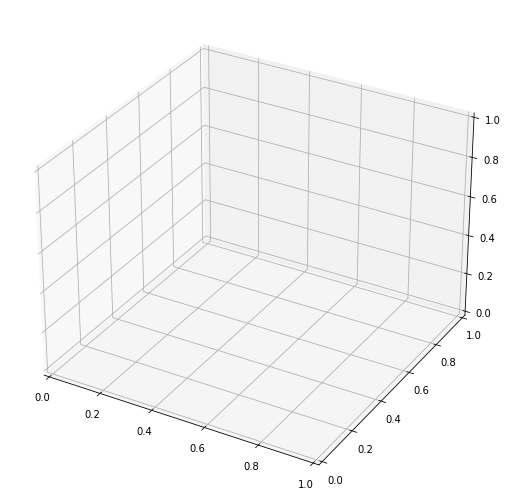

In [152]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

ax.plot_surface(tableau['Tranches de RI'], tableau['Tranches de PFS'], shrank['Tranches de PFS'])

plt.show()

C:\Users\arceb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

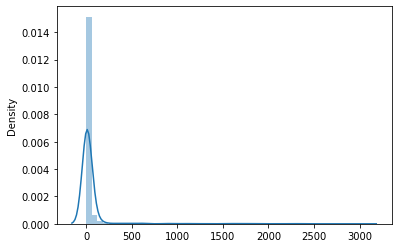

In [153]:
sns.distplot(z)